# 基础之基础

In [16]:
# // 表示取整除，向下取整
print(7//2)   # 3

a = 2
print(isinstance(a, int)) # 判断两变量类型是否一致

# list 数据类型 有序可变容器
list = ["a", 123, "b", 456]
list.append("c") # 末尾添加元素
list.extend(["d", "e"]) # 批量追加
list.insert(0, "fuck") # 指定位置插入元素
list.pop()   # 删除末尾元素
list.pop(3)   # 指定位置删除
id = list.index("a")   # 根据值找位置
print(list, id) 
list.clear()   # 清空列表


3
True
['fuck', 'a', 123, 456, 'c', 'd'] 1
我 是 你 爹


- **字典数据结构**

In [3]:
dict = {
    "roger": "帅哥",
    "lv": "更帅"

}
print(dict.get("roger"))  # 根据键返回对应的值
print(dict.get("hobby", 123))   # 查找hobby这个键如果存在返回对应值，如果不存在输出我们指定值

keys = dict.keys()   # 返回所有的keys
values = dict.values()   # 返回所有的values
items = dict.items()   # 返回所有的键值对

# 字典的索引是keys
print(dict["roger"])

帅哥
123
帅哥


** is和==的区别 **
- ==，用于比较两个值是否相等。
- is，用于表示内存地址是否一致。

# Class的一些用法知识

In [2]:
# python中类里面定义的函数，参数必须要有self，无特别实际意义
# 类中__init__是系统自带初始化函数，一些类的属性及参数可以在这里定义，则实例化的时候会自动初始化
class File:
    def __init__(self, name, create_time="today"):
        self.name = name
        self.create_time = create_time
    
    def change_name(self, new_name):
        self.name = new_name

my_file = File("my_file")
# 调用实例中，类的功能
my_file.change_name("new_name") 
print(my_file.name)

new_name


In [3]:
# 继承
class File:
    def __init__(self, name, create_time="today"):
        self.name = name
        self.create_time = create_time
    
    def get_info(self):
        return self.name + "is created at" + self.create_time

class Video(File):  # 继承了 File 的属性和功能
    def __init__(self, name, window_size=(1080, 720)):
        # 将共用属性的设置导入 File 父类
        super().__init__(name=name, create_time="today")   # 一般我们在继承的时候，子类的__init__函数都会继承父类公共属性
        self.window_size = window_size                     # 使用super().__init__(必须传递公共参数，不然会报错)

class Text(File): # 继承了 File 的属性和功能
    def __init__(self, name, language="zh-cn"):
        # 将共用属性的设置导入 File 父类
        super().__init__(name=name, create_time="today") 
        self.language = language
    
    # 也可以在子类里复用父类功能
    def get_more_info(self):
        return self.get_info() + ", using language of " + self.language       # 这个函数调用了父类的功能接口

v = Video("my_video")
t = Text("my_text")
print(v.get_info())     # 调用父类的功能
print(t.create_time)    # 调用父类的属性
print(t.language)       # 调用自己的属性
print(t.get_more_info()) # 调用自己加工父类的功能

my_videois created attoday
today
zh-cn
my_textis created attoday, using language of zh-cn


In [5]:
# 私有属性和功能
class File:
    def __init__(self):
        self.name = "f1"
        self.__deleted = False  # 我不让别人用这个变量
        self._type = "txt"      # 我不想别人使用这个变量
    
    def delete(self):
        self.__force_delete()
    
    def __force_delete(self):  # 我不让别人使用这个功能
        self.__deleted = True
        return True
        
    def _soft_delete(self):     # 我不想让别人使用这个功能
        self.__force_delete()   # 我自己可以在内部随便调用
        return True

f = File()
print(f._type)      # 可以拿到值，但是这个类的作者不想让你直接这样拿到
print(f._soft_delete())  # 可以调用，但是这个类的作者不想让你直接调用

# 接下来的两个实验都会报错
# f.__deleted
# f.__force_delete()

'''

     _ 一个下划线开头的定义	"弱隐藏" 不想让别人用 （别人在必要情况下还是可以用的）
     __ 两个下划线开头的定义	"强隐藏" 不让别人用
     
'''

# 有的属性或者功能，你不需要让别人知道，也不需要让别人调用，纯属自己开发时才会用到的一些东西， 所以就可以用私有化

txt
True


'\n\n     _ 一个下划线开头的定义\t"弱隐藏" 不想让别人用 （别人在必要情况下还是可以用的）\n     __ 两个下划线开头的定义\t"强隐藏" 不让别人用\n     \n'

# 文件管理及操作

## 文件基础读写操作

In [15]:
# 创建文件标准流程
f = open("new_file.txt", "w")   # 创建并打开， 把“w“ 换成"r"即为只读模式
f.write("some text...\n")         # 在文件里写东西
f.close()                       # 关闭，每次打开文件也需要有关闭操作
# 注意，在列表里，每个元素最后都最好写一个\n来表示要另起一行。不然读出来的时候就黏在一起了

# 为了防止使用者忘记close，python提供with方法打开文件读写
with open("new_file2.txt", "a") as f1:
    f1.writelines(["some text for file2...\n", "2nd line\n"])
# 写入数据的方式 writelines(), 当你传入的时候像列表样的数据时， 列表中的每个元素就是一行记录，数据会分行来写

# a	在文本最后添加
# wb	写二进制 binary
# rb	读二进制 binarya	在文本最后添加

# 当我们写入中文时可能发生乱码，编码错误问题
with open("chinese.txt", "wb") as f:   # 以二进制写入
    f.write("这是中文的，this is Chinese".encode("gbk"))  # 编码方式

with open("chinese.txt", "rb", ) as f:
    print(f.read().decode('gbk'))   # 赋予解码方式

# 或者用下面的方式，在读模式时就指定编码方式
# with open("chinese.txt", "r", encoding="gbk") as f:
#     print(f.read())

这是中文的，this is Chinese


- **使用with后不管with中的代码出现什么错误，都会进行对当前对象进行清理工作，即自动close。在深度学习中我们也常用with as来防止自动求导**

## 文件目录管理

In [22]:
# 用Python中提供的 os 库来做文件操作
import os

# 查看当前所在目录和目录文件，我们才能进行后面的管理
print("当前目录：", os.getcwd())   # 得到当前目录地址
print("当前目录里有什么：", os.listdir())   # 目录中存在的文件list

# 创建一个文件夹进行实验， 相同名称不会重复创建
os.makedirs("empty", exist_ok=True)
print(os.path.exists("empty"))


当前目录： /home/studio-lab-user/sagemaker-studiolab-notebooks/机器学习&深度学习
当前目录里有什么： ['.ipynb_checkpoints', 'sciki-learn.ipynb', 'save_models', 'Pytorch_Basic.ipynb', 'net.pkl', 'net_params.pkl', 'data', 'MINST数据集入门实战.ipynb', 'mnist', 'PyTorch基础和线性神经网络构建.ipynb', 'Python基础复习.ipynb', 'new_file.txt', 'new_file2.txt', 'chinese.txt', 'empty']
True
user created
['mofan']


In [28]:
# 比如用户注册了我这个系统，我得为这个用户创建一个他的文件夹
if os.path.exists("empty/roger"):
    print("user exist")
else:
    os.makedirs("empty/roger")
    print("user created")
print(os.listdir("empty"))

# if os.path.exists("empty/mofan"):
#     print("user exist")
# else:
#     os.makedirs("empty/mofan")
#     print("user created")
# print(os.listdir("empty"))


# 如果用户注销了，我们是不是要把文件夹删除？  特别的，如果子文件夹中有文件则无法通过removedirs删除该文件夹，会报错
if os.path.exists("empty/mofan"):
    os.removedirs("empty/mofan")        # 注意文件夹中如果只有一个文件夹时，采用这种删除方式会把父文件夹一起删除
    print("user removed")
else:
    print("user not exist")

user exist
['roger']
user not exist


In [30]:
# 遇到上面文件夹中有文件的情况使用shutil库可以清空整个目录，当然回收站是找不到的。。。慎用
# import shutil

# shutil.rmtree("empty/mofan")    # rmtree其实就是removetree嘛
# print(os.listdir("empty"))

# 还可以给文件夹改名字
os.makedirs("empty/mofan", exist_ok=True)
os.rename("empty/mofan", "empty/rogergodlike")
print(os.listdir("empty"))

['roger', '.ipynb_checkpoints', 'rogergodlike']


In [32]:
# 判断这是否是一个文件或者是否是一个文件夹，都有很多中不同的判断方式
os.makedirs("empty/mofan", exist_ok=True)
with open("empty/mofan/a.txt", "w") as f:
    f.write("nothing")
print(os.path.isfile("empty/mofan/a.txt")) # True
print(os.path.exists("empty/mofan/a.txt")) # True
print(os.path.isdir("empty/mofan/a.txt")) # False   # 判断是否是个文件夹
print(os.path.isdir("empty/mofan"))  # True

True
True
False
True


In [38]:
# 告诉你一个文件目录，我想为这个文件创建一个副本
# 先拿到文件名 os.path.basename
# 再拿文件夹名 os.path.dirname
# 为副本重命名
# 把目录重新组合 os.path.join

# 法一
# def copy(path):
#     filename = os.path.basename(path)   # 文件名
#     dir_name = os.path.dirname(path)    # 文件夹名
#     new_filename = "new_" + filename    # 新文件名
#     return os.path.join(dir_name, new_filename) # 目录重组
# print(copy("empty/mofan/a.txt"))

# 法二
def copy(path):
    dir_name, filename = os.path.split(path)
    new_filename = "new_" + filename    # 新文件名
    return os.path.join(dir_name, new_filename) # 目录重组
print(copy("empty/mofan/a.txt"))

print(os.path.exists("empty/mofan/new_a.txt"))

# 感觉这些方法好像并没有实际创建出一个文件，并没有找到

empty/mofan/new_a.txt
False


# 正则表达式

- **正则表达式的本质就是设置好一定的模板去匹配要找的字符串，相当于格式规范**

- **正则表达式 regex 就是为了让你尽情匹配文字，用一些规则或者模板来帮你找到文字，替换文字的工具**

- **正则表达式默认是贪婪匹配就是说尽可能多的取匹配符合条件的数据，而非贪婪匹配是说尽可能少的匹配符合前面条件的数据，可有可无**

In [1]:
import re
ptn = re.compile(r"\w+?@\w+?\.com")    # 找一个格式是否符合的字符串

matched = ptn.search("mofan@mofanpy.com")
print("mofan@mofanpy.com is a valid email:", matched)   # 返回值不是一个true那么简单
matched = ptn.search("mofan@mofanpy+com")
print("mofan@mofanpy+com is a valid email:", matched)

mofan@mofanpy.com is a valid email: <re.Match object; span=(0, 17), match='mofan@mofanpy.com'>
mofan@mofanpy+com is a valid email: None


In [2]:
matched = re.search(r"\w+?@\w+?\.com", "mofan@mofanpy.com")
print("mofan@mofanpy.com:", matched)
matched = re.search(r"\w+?@\w+?\.com", "the email is mofan@mofanpy.com.")
print("the email is mofan@mofanpy.com:", matched)

# 可以看到在返回的信息中，有一个 span=(13,30)，有一个 match='mofan@mofanpy.com 这类的信息
# 他们分别代表着在原始字符串中，我们找到的 pattern 是从哪一位到哪一位，pattern 找到的具体字符串又是什么。

# 用 r"xxx" 来写一个 pattern，这是为什么呢？因为正则表达式很多时候都要包含\，
# r 代表原生字符串， 使用 r 开头的字符串是为了不让你混淆 pattern 字符串中到底要写几个 \，
# 你只要当成一个规则来记住在写 pattern 的时候，都写上一个 r 在前面就好了

mofan@mofanpy.com: <re.Match object; span=(0, 17), match='mofan@mofanpy.com'>
the email is mofan@mofanpy.com: <re.Match object; span=(13, 30), match='mofan@mofanpy.com'>


In [42]:
match = re.search(r"run", "I run to you")
print(match)
print(match.group())    # 用group方法来提取找到的字符串

<re.Match object; span=(2, 5), match='run'>
run


In [4]:
# 几种方法不区分过去式或者字符中间有些许差距，使用或运算'|',[],()等符号
print(re.search(r"ran|run", "I run to you").group())
print(re.search(r"r[au]n", "I run to you").group())
print(re.search(r"f(i|ou)nd", "I found you").group())


run
run
found


- **匹配规则如下，简化要写的字符，不然不可能同一种模式我们写很多行，程序显然就很麻烦而且增加工作量**

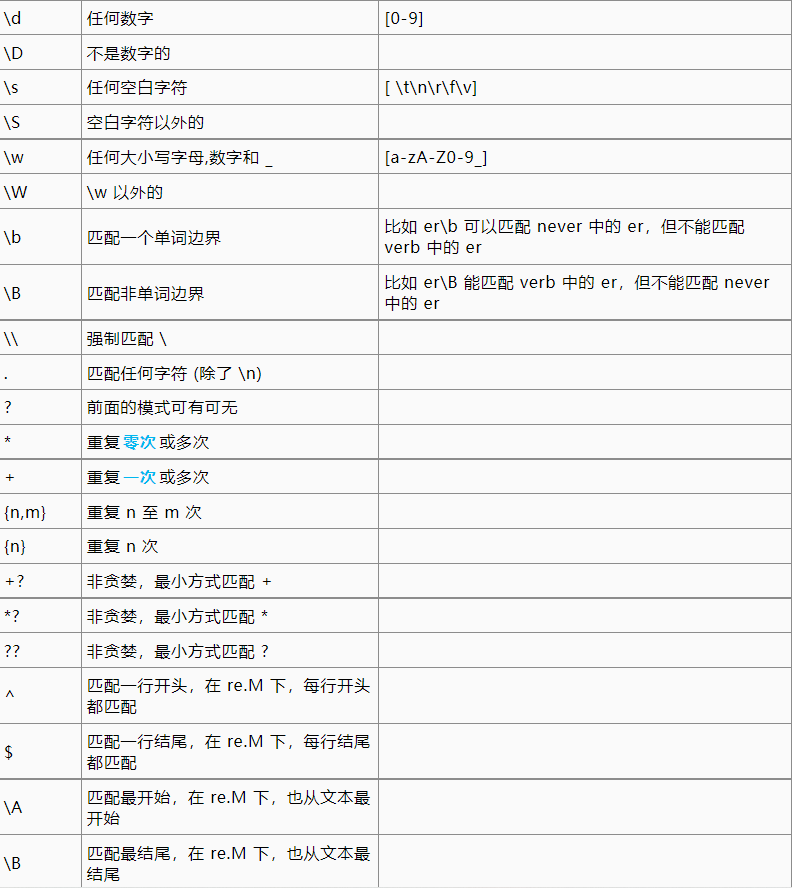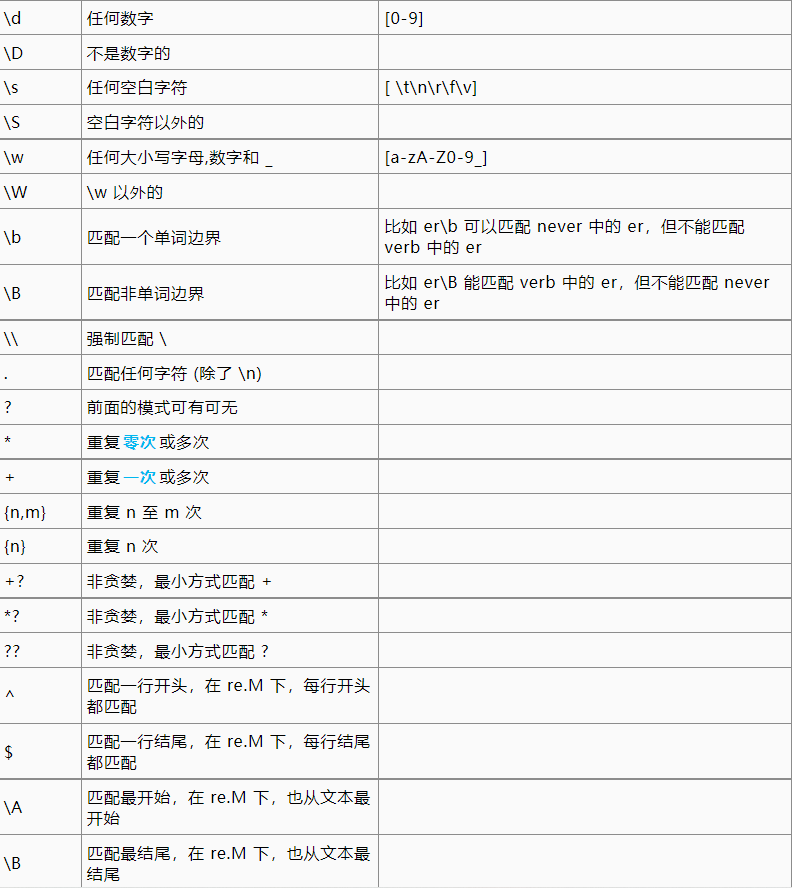

In [5]:
# 假设我们只识别 138 开头的手机号码，下面的 \d{8} 就是用来表示任意的数字，重复 8 遍。 '\'表示模式分隔
print(re.search(r"138\d{8}", "13812345678").group())
print(re.search(r"138\d{8}", "138123456780000").group())

13812345678
13812345678


In [8]:
# 中文识别， 汉字通常是用 Unicode 来编码表示的
print(re.search(r"不?爱", "我爱你"))   # ？表示找到了就是有，没找到就无，所以是可有可无
print(re.search(r"不?爱", "我不爱你"))
print(re.search(r"不.*?爱", "我不是很爱你"))

# 如何匹配所有汉字？
print(re.search(r"[\u4e00-\u9fa5]+", "我爱莫烦Python。").group())   # []中表示一个查找范围从哪到哪，里面的内容不分先后顺序
print(re.search(r"[\u4e00-\u9fa5！？。，￥【】「」]+", "我爱莫烦。莫烦棒！").group())

<re.Match object; span=(1, 2), match='爱'>
<re.Match object; span=(1, 3), match='不爱'>
<re.Match object; span=(1, 5), match='不是很爱'>
我爱莫烦
我爱莫烦。莫烦棒！


## 查找替换等更多功能

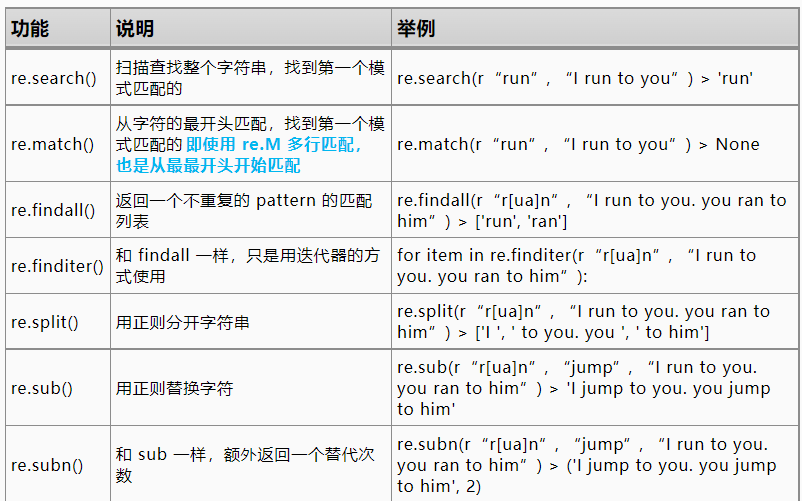

In [7]:
# 比如有一个正则模式，想要提取出匹配模式当中的一些字段，而不是全字段。
# 举个例子，文件名千奇百怪，想找到 *.jpg 图片文件，而且只返回给我去掉 .jpg 之后的纯文件名
# 有好几种方式都可以实现
# 法一：
string = "I have 2021-02-01.jpg, 2021-02-02.jpg, 2021-02-03.jpg"
found = []
for i in re.finditer(r"[\w-]+?\.jpg", string):
    found.append(re.sub(r".jpg", "", i.group()))
print(found)

# 法二：介绍一下和 group 一起用的 ()。只要我们在正则表达中，加入一个 () 选定要截取返回的位置， 他就直接返回括号里的内容。
print("without ():", re.findall(r"[\w-]+?\.jpg", string))
print("with ():", re.findall(r"([\w-]+?)\.jpg", string))   # 把想要输出的部分加上()

# 那如果我想获取更详细的信息呢？比如年月日分开获取？答案是多做几个括号就好了，然后用 group 功能获取到不同括号中匹配到的字符串
match = re.finditer(r"(\d+?)-(\d+?)-(\d+?)\.jpg", string)
for file in match:    # group(0)则返回全匹配的内容
    print("matched string:", file.group(0), ",year:", file.group(1), ", month:", file.group(2), ", day:", file.group(3))
# 上述方法也可以用findall函数，只不过无法显示输出全匹配下的group(0)操作


# 有时候我们 group 的信息太多了，括号写得太多，让人眼花缭乱怎么办？
# 我们还能用一个名字来索引匹配好的字段， 然后用 group("索引") 的方式获取到对应的片段
# 为了索引，我们需要在括号中写上 ?P<索引名> 这种模式
match = re.finditer(r"(?P<y>\d+?)-(?P<m>\d+?)-(?P<d>\d+?)\.jpg", string)
for file in match:
    print("matched string:", file.group(0), 
        ", year:", file.group("y"), 
        ", month:", file.group("m"), 
        ", day:", file.group("d"))

['2021-02-01', '2021-02-02', '2021-02-03']
without (): ['2021-02-01.jpg', '2021-02-02.jpg', '2021-02-03.jpg']
with (): ['2021-02-01', '2021-02-02', '2021-02-03']
matched string: 2021-02-01.jpg ,year: 2021 , month: 02 , day: 01
matched string: 2021-02-02.jpg ,year: 2021 , month: 02 , day: 02
matched string: 2021-02-03.jpg ,year: 2021 , month: 02 , day: 03
matched string: 2021-02-01.jpg , year: 2021 , month: 02 , day: 01
matched string: 2021-02-02.jpg , year: 2021 , month: 02 , day: 02
matched string: 2021-02-03.jpg , year: 2021 , month: 02 , day: 03


## 多模式匹配

- **在正则中还有一些特别的 flags，可以在 re.match(),re.findall() 等功能中使用。 主要目的也是方便我们编写正则，和用更简单的方法处理更复杂的表达式**

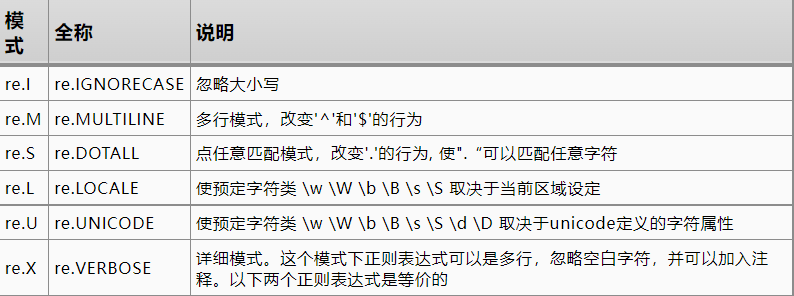

In [27]:
print(re.findall(r"r[au]n", "I Ran to you", flags = re.I))   # 忽略大小写

# 我们想在每行文字的开头匹配特定字符，如果用 ^ran 固定样式开头，我是匹配不到第二行的 ran to you 的，
# 所以我们得加上一个 re.M flag。 注意我们提到过的 re.search() 和 re.match() 有一丢丢不一样，
# re.match() 是不管你有没有 re.M flag，我的匹配都是按照最头头上开始匹配的。 
# 所以在下面的实验中，re.match() 匹配不到任何东西。
ptn = r"^ran"
string = """I
ran to you"""
print("without re.M:", re.search(ptn, string))
print("with re.M:", re.search(ptn, string, flags=re.M))
print("with re.M and match:", re.match(ptn, string, flags=re.M))
string = """I
Ran to you"""
print("with re.M and re.I:", re.search(ptn, string, flags=re.M|re.I))   # 可以同时使用多个flags

# 另一种flags使用写法，(?im) 这就是说要用 re.I, re.M
string = """I
Ran to you"""
re.search(r"(?im)^ran", string)

['Ran']
without re.M: None
with re.M: <re.Match object; span=(2, 5), match='ran'>
with re.M and match: None
with re.M and re.I: <re.Match object; span=(2, 5), match='Ran'>


<re.Match object; span=(2, 5), match='Ran'>

## 更快地执行方式

In [30]:
'''
    如果你要重复判断一个正则表达式，我们通常不会直接在 re.search(ptn) 这里里面写 ptn，
    而是在外面先定义好，解析好一个正则 pattern，然后直接用这个 pattern 循环执行查找。 
    这样可以更有效率，比如你要重复查找 100 万次，我们先 compile 正则再查找能节省可观的时间
'''

import time
n = 1000000
# 不提前 compile
t0 = time.time()
for _ in range(n):
    re.search(r"ran", "I ran to you")
t1 = time.time()
print("不提前 compile 运行时间：", t1-t0)

# 先做 compile
ptn = re.compile(r"ran")      # compile就是直接先定义好匹配规则：pattern，相当于在match或者search时省略了定义过程
for _ in range(n):
    ptn.search("I ran to you")    # 两种写法本质上是一致的，就是速度有区别
print("提前 compile 运行时间：", time.time()-t1)

不提前 compile 运行时间： 0.5903210639953613
提前 compile 运行时间： 0.14457297325134277


# PICKLE/JSON

In [33]:
# 把字典打包到pickle文件中
import pickle

data = {"filename": "f1.txt", "create_time": "today", "size": 111}
pickle.dumps(data)    # 可见信息被编码了

# 保存成pickle文件
with open("data.pkl", "wb") as f:   # 以二进制方式写入，pickle就是这种编码格式
    pickle.dump(data, f)

import os
os.listdir()

# 读文件
with open("data.pkl", "rb") as f:
    data_o = pickle.load(f)
print(data_o)

{'filename': 'f1.txt', 'create_time': 'today', 'size': 111}


In [34]:
# pickle 甚至都可以打包 Python 的功能以及类。打包功能的意义我觉得并不是很大， 但是能打包类还是比较有意思的
class File:
    def __init__(self, name, create_time, size):
        self.name = name
        self.create_time = create_time
        self.size = size
    
    def change_name(self, new_name):
        self.name = new_name

data_class = File("f2.txt", "now", 222)
# 存
with open("data_class.pkl", "wb") as f:
    pickle.dump(data_class, f)
# 读
with open("data_class.pkl", "rb") as f:
    read_data = pickle.load(f)
print(read_data.name)
print(read_data.size)


# 假如在打开的文件，网络连接，线程，进程，栈帧等等是无法保存到pickle的
# 如果你在 class 中把上述东西赋值到了 class 的属性上
# 比如定义了self.file = open()，这样的 class 在 pickle 的时候会报错的
# 用户自定义类可以通过提供 __getstate__() 和 __setstate__() 方法来绕过 pickle 的这些限制
# pickle.dump() 会调用 __getstate__() 获取序列化的对象。 __setstate__() 在反序列化时被调用

f2.txt
222


In [35]:
# 另一种序列化工具，json
# 什么是 json 数据？一般来说，Python 里的字典，列表都可以是 json 数据格式，json库中很多函数接口和pickle类似
import json

data = {"filename": "f1.txt", "create_time": "today", "size": 111}
j = json.dumps(data)
print(j)
print(type(j))
# 就是照搬字典的样子，变成了一个字符串形式的字典。没错，这就是 json 数据
# 保存和打开文件方式和pickle几乎一模一样，就不举例了
# 但是 json 不能序列化保存 class。你只能挑出来重要的信息，放到字典或列表里，然后再用 json 打包字典。

{"filename": "f1.txt", "create_time": "today", "size": 111}
<class 'str'>


# 使用unittest做测试

In [4]:
# 很多时候，你并不只有一个功能要测试，你还会有很多其他的，想一起测试。
# 这也很好办。 而且如果你其中某一个有问题，他也会单独指出到底是哪一个有问题，问题在哪。
import unittest

def my_func1(a):
    if a == 1:
        return 2
    elif a == -1:
        return 3
    else:
        return 1

def my_func2(b):
    if b != "yes":
        raise ValueError("you can only say yes!")
    else:
        return True

class TestFunc(unittest.TestCase):
    def test_func1(self):   # my_func1函数没问题
        self.assertEqual(my_func1(1), 2)   
        self.assertEqual(my_func1(-1), 3)
        for i in range(-100, 100):
            if i == 1 or i == -1:
                continue
            self.assertEqual(my_func1(i), 1)
    
    def test_func2(self):   # 也没问题，测试应该显示通过
        self.assertTrue(my_func2("yes"))
        with self.assertRaises(ValueError):
            my_func2("nononono")
#if __name__ == '__main__':
    #unittest.main()

# jupyter中不要使用unittest.main()了会报错

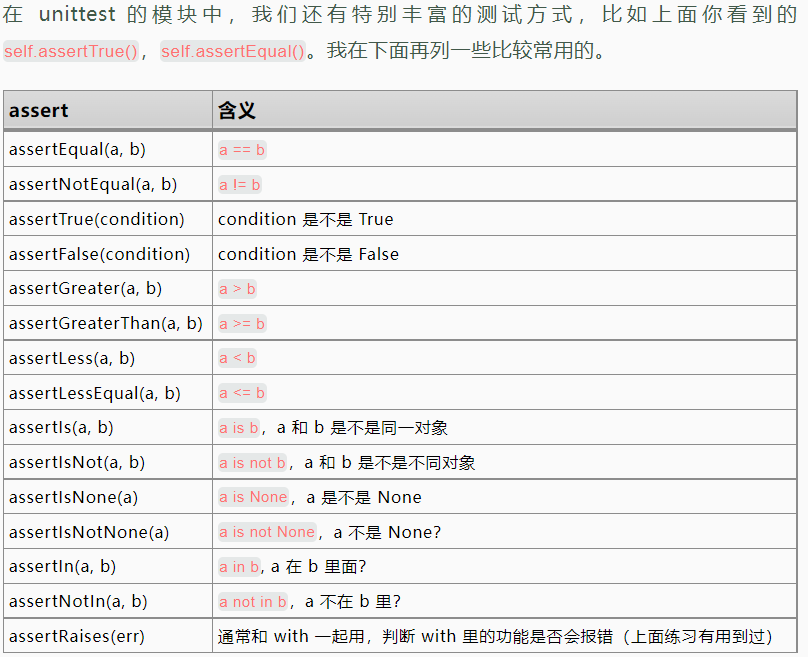

In [44]:
# 如果你写了很多 test，但是只想 test 某些功能，咋整？有复杂的办法，也有简单的。先说复杂的，你在你的 test.py 中
# 将代码最下边的 unittest.main() 替换成下面这段代码中那些 TestSuite() 和 TextTestRunner() 部分
class TestFunc1(unittest.TestCase):
    def test_func1(self):
        self.assertEqual(my_func1(1), 2)   
        self.assertEqual(my_func1(-1), 3)
        for i in range(-100, 100):
            if i == 1 or i == -1:
                continue
            self.assertEqual(my_func1(i), 1)
    
    def test_func2(self):
        self.assertTrue(my_func2("yes"))
        with self.assertRaises(ValueError):
            my_func2("nononono")

# 定义一个 suite 替换 unittest.main()
suite = unittest.TestSuite()
suite.addTest(TestFunc('test_func1'))
unittest.TextTestRunner().run(suite)


# 在终端运行指令也可以测试整体或局部功能
# python -m unittest tests.py
# python -m unittest tests.TestFunc.test_func2

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

# 字符串高级玩法

## 字符串格式化输出

In [1]:
# 一般的情况下，我们只需要打印出一段特定的话就好了， 但是还有些时候，这些话会应为场景的不同，方式的不同，参数的不同，里面的具体内容就会随之发生改变

# %模式
name = "莫烦Python"
age = 18
gender = "男"
print("我的名字是" + name + "！我" + str(age) + "岁了，我是" + gender + "的~")
print("我的名字是 %s !我 %d 岁了，我是 %s 的~" % (name, age, gender))

# 当我们不记得字符的排列顺序是怎样的，就很容易按照上面格式填错。 那么能不能用字典一样的模式来填入数据呢？
name = "莫烦Python"
age = 18
gender = "男"
print("我的名字是 %(nm)s !我 %(age)d 岁了，我是 %(gd)s 的~" % {"nm": name, "age":age, "gd":gender})

## 使用%有一个问题是，如果字符串中有百分比，那么要在百分比对应位置后面多加一个%，不然会报错

text = "I am %s, 100%%nice." % "roger"
print(text)

我的名字是莫烦Python！我18岁了，我是男的~
我的名字是 莫烦Python !我 18 岁了，我是 男 的~
我的名字是 莫烦Python !我 18 岁了，我是 男 的~
I am roger, 100%nice.


In [53]:
# format格式输出方法
name = "莫烦Python"
age = 18
height = 1.8
print("我的名字是 %s !我 %d 岁了，我 %.1f 米高~" % (name, age, height))
print("我的名字是 {} !我 {} 岁了，我 {} 米高~".format(name, age, height))

# 其实除了这样的方式，format 还支持很多其他方式。比如我给 {} 里放一个数字，
# 表示后面 format 里面的 index，这样我就能复用传入的值了。这一招就比百分号模式要好一些
name = "莫烦Python"
age = 18
height = 1.8
print("我的名字是 {0} !我 {1} 岁了，我 {2} 米高~我是{0}".format(name, age, height)) 
# 相当于用0指示name，1指示age，2指示height

# 也可以像百分号那样用字典传值
print("我的名字是 {nm} !我 {yr} 岁了，我 {ht} 米高~".format(nm=name, yr=age, ht=height))
# {}里面还可以添加一些特定符号

我的名字是 莫烦Python !我 18 岁了，我 1.8 米高~
我的名字是 莫烦Python !我 18 岁了，我 1.8 米高~
我的名字是 莫烦Python !我 18 岁了，我 1.8 米高~我是莫烦Python
我的名字是 莫烦Python !我 18 岁了，我 1.8 米高~


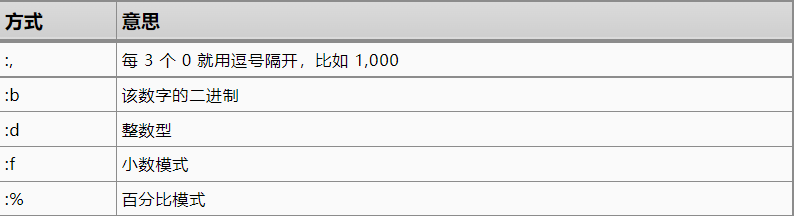

In [54]:
txt = "You scored {:%}"
print(txt.format(2.1234))

txt = "You scored {:.2%}"
print(txt.format(2.1234))

You scored 212.340000%
You scored 212.34%


In [5]:
# python3.6之后还支持f格式化字符串，这种方式非常简洁方便
name = "莫烦Python"
age = 18
height = 1.8
print(f"我的名字是 {name} !我 {age} 岁了，我 {height} 米高~")
# 甚至可以在{}里面做运算，{}里面添加的特殊符号跟format一致
print(f"我的名字是 {name} !我 {age+1} 岁了，我 {height+10} 米高~")
# 甚至加个等号还能自动帮你计算
print(f"我的名字是 {name} !我 {age+1=} 岁了，我 {height+10=} 米高~")

def my_func(a, b):
    return a + b
print(f"1+2 = {my_func(1,2)}")   # 甚至还可以传函数

我的名字是 莫烦Python !我 18 岁了，我 1.8 米高~
我的名字是 莫烦Python !我 19 岁了，我 11.8 米高~
我的名字是 莫烦Python !我 age+1=19 岁了，我 height+10=11.8 米高~
1+2 = 3


## 一些常用字符串修改函数
- **而且很多还可以和正则表达式配合着用**

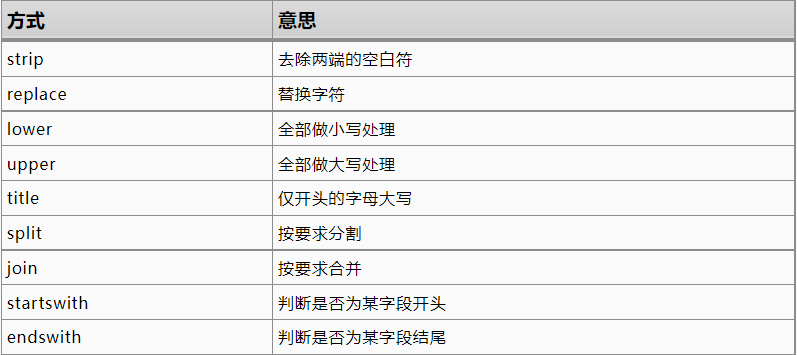

- **注意字符串本身的值不可以直接在原来的基础上修改，只能通过赋值的方式修改**

In [60]:
print("  我不想要前后的空白，但是  中间\n的可以有\n  ".strip())
print("帮我替换掉莫烦".replace("莫烦", "沫凡"))
print("How ABOUT lower CaSe?".lower())
print("And upper CaSe?".upper())
print("do tiTle For me".title())
print("你|帮|我|拆分|一下|这句话".split("|"))
print("|".join(["你","帮", "我", "重组", "一下", "这句话"]))
print("我在街头看到你".startswith("我在"))
print("我在街头看到你".startswith("街头"))
print("我在巷尾看到你".endswith("看到你"))
print("我在巷尾看到你".endswith("巷尾"))

我不想要前后的空白，但是  中间
的可以有
帮我替换掉沫凡
how about lower case?
AND UPPER CASE?
Do Title For Me
['你', '帮', '我', '拆分', '一下', '这句话']
你|帮|我|重组|一下|这句话
True
False
True
False


# Python中的一些偷懒写法/用法

## lambda表达式：一种更直接的Function

In [69]:
# 例如下面这个很简单的函数，如果我们在程序中使用次数较少，且函数形式较为简单，则可以采用lambda写法
def add(a, b):
    return a + b

print(add(1,2))

add = lambda a, b: a+b    # 两种函数定义是一致的
print(add(1,2))


3
3


## for的简写模式

In [80]:
l = []
for i in range(10):
    l.append(i*2)
print(l)

n = [i*2 for i in range(10)]
print(n)

# 甚至可以用这种方法创造字典
d = {"index_%d" % i: i*2 for i in range(10)}
print(d)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
{'index_0': 0, 'index_1': 2, 'index_2': 4, 'index_3': 6, 'index_4': 8, 'index_5': 10, 'index_6': 12, 'index_7': 14, 'index_8': 16, 'index_9': 18}


## 一行if-else判断

In [81]:
done = False
if done:
    a = 1
else:
    a = 2
print(a)

a = 1 if done else 2
print(a)

2
2


## 一行for+if else判断

In [82]:
l = []
for i in range(10):
    if i % 2 == 0:
        l.append(i*2)
print(l)

l = [i*2 for i in range(10) if i%2==0]
print(l)

[0, 4, 8, 12, 16]
[0, 4, 8, 12, 16]


## 利用enumerate自动添加index

In [84]:
count = 0
l = [11,22,33,44]
for data in l:
    if count == 2:
        data += 11
    l[count] = data
    count += 1
print(l)

l = [11,22,33,44]
for count, data in enumerate(l):   # 同时提取索引和对应的值，甚至还可以在enumerate中设置count的初始值，即start=？
    if count == 2:
        data += 11
    l[count] = data
print(l)

[11, 22, 44, 44]
[11, 22, 44, 44]


## 使用Zip进行同时迭代

In [86]:
# 把两个列表整合成一个字典
name = ["a", "b", "c"]
score = [1,2,3]
d = {}
for i in range(3):
    d[name[i]] = score[i]
print(d)

name = ["a", "b", "c"]
score = [1,2,3]
f = {}
for n, s in zip(name, score):    # zip就有点打包的意思
    f[n]=s
print(f)

{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}


## 列表翻转的方式

In [87]:
l = [1,2,3]
_l = [l[-i-1] for i in range(len(l))]
print(_l)

[3, 2, 1]


In [88]:
l = [1,2,3]
l.reverse()
print(l)

[3, 2, 1]


In [89]:
l = [1,2,3]
for i in reversed(l):   # reversed就是reverse在for循环中的迭代器而已
    print(i)

3
2
1


In [90]:
l = [1,2,3]
_l = l[::-1]     # 切片方式，-1就表示步长从后往前数呗
print(l)
print(_l)

[1, 2, 3]
[3, 2, 1]


# 深拷贝与浅拷贝

- **深拷贝就是完全生成一个新的个体与原先被拷贝的实体互不影响，而浅拷贝则是相当于拷贝一个副本，当改变值时会影响到原来的实体**

- **Python在创造之初，就约定，列表中直接存放的数值，字符，和存 class 实例，列表，字典不同。 对数值字符的复制是深拷贝，而其他则是浅拷贝**

In [5]:
# 可见对直接数值类型是深拷贝，不改变原先列表内容
l = [1,2,3]
_l = l.copy()
_l[0] = 4
print(l)
print(_l)


# 列表里面套列表的copy之后则是浅拷贝，改变列表里面其中的值则都变
l1 = [[1],[2],[3]]
_l1 = l1.copy()
_l1[0][0] = 4
print(l1)
print(_l1)

# 类也类似
class File:
    def __init__(self, name):
        self.name = name

audio = File("mp3")
file = File("txt")
l2 = [audio, file]
_l2 = l2.copy()
_l2[0].name = "mp4"
print(audio.name)   # "mp4"


# 那么如何强制使用深拷贝呢？ 答案是使用deepcopy
from copy import deepcopy
l3 = [[1],[2],3]
_l3 = deepcopy(l3)
_l3[0][0] = -1
print(_l3)
print(l3)

[1, 2, 3]
[4, 2, 3]
[[4], [2], [3]]
[[4], [2], [3]]
mp4
[[-1], [2], 3]
[[1], [2], 3]


# python中的生成器

- **在循环的时候，我们的目的是为了每次循环拿到一些特定数据，然后为这些数据做处理。但是无可避免的会在内存中记录这些数值， 当需要记录的数值很多的时候，我们的内存可能就吃不消了。而生成器，即现做现吃。减少程序内存开销**

In [7]:
items = []  # 假设这里在记录一个很大的列表，如果就直接循环输出，可能会爆掉
for item in range(5):
    if item % 2 == 0:
        items.append(item)

for i in items:
    print(i)
    
# 使用生成器方式重写循环
def need_return():
    for item in range(5):
        if item % 2 == 0:
            print("我要扔出去一个 item=%d 了" % item)
            yield item  # 这里就会返回给下面的 for 循环 ，扔出item之后进入for循环，执行完毕之后又跳回函数本身
            print("我又回到里面了")

for i in need_return():   # 在yield之后运行，运行结束后又跳回函数
    print("我在外面接到了一个 item=%d\n" % i)

0
2
4
我要扔出去一个 item=0 了
我在外面接到了一个 item=0

我又回到里面了
我要扔出去一个 item=2 了
我在外面接到了一个 item=2

我又回到里面了
我要扔出去一个 item=4 了
我在外面接到了一个 item=4

我又回到里面了


In [8]:
# 还可以在生成器中做各种运算，赋初值，本质其实就是一个函数
def need_return(init_value):
    tmp = init_value
    for item in range(300):
        if item == tmp:
            tmp *= 2
            yield item

for i in need_return(10):
    print(i)

10
20
40
80
160


## 定义生成器类

- **__iter__ 的意思是，当我在外面 for 循环进行迭代时，我返回什么？在下面例子中，我就把自己这个 class 本身返回回去，继续让自己做迭代就好了**
- **__next__ 的意思是每次迭代的时候，我的函数会放出来什么元素。下面的功能中实现的就是放出来一个被计算过的 item 元素**

In [10]:
class NeedReturn:
    def __init__(self, init_value=0):
        self.tmp = init_value
        self.item = 0

    def __iter__(self):
        return self

    def __next__(self):
        while True:
            if self.item == self.tmp:
                self.tmp *= 2
                return self.item
            self.item += 1
            if self.item == 300:
                raise StopIteration    # 注意这里只能这么写，不能用break跳出循环，就是一个python的代码机制

for i in NeedReturn(10):
    print(i)

10
20
40
80
160


# 装饰器（本质上其实也是个函数）

- **Decorator的好处就是，我们可以对批量函数进行相同处理。当你发现有一批Function都要做些前置或者后置的工作，就可以统一给他们装修，即使用装饰器。装饰器本质上是给一个函数增添额外的功能**

In [16]:
# 下面的代码中，我们使用装饰器有一个特别的写法，就是在你要套娃的 outer_fn 上面写上 @decorator，
# 其实 @ 后面就是你定义的那个装饰器 function 的名字。 比如这里我用的是 def decorator() 那么 @ 后面就是decorator这个名字
# 寓意着，我要把 decorator 这个 function 套在 outer_fn 外面

# 注意这是装饰器标准写法，必须参照这种格式，装饰器是相当于把函数当作参数传递给另一个参数
def decorator(fn):   # fn是个函数
    def wrapper(name):
        print(name+"say I'm in")    # 这是我的前处理
        return fn(name)
    return wrapper        # 返回值必须与定义函数名一致

@decorator
def outer_fn(name):
    print(name+"say I'm out")

outer_fn("mofanpy") # 先传参进入装饰器，再返回当前函数的输出内容

# 同样的，也能做后处理
def decorator(fn):
    def wrapper(name):
        print(name+"say I'm in_pre")    # 这是我的前处理
        res = fn(name)
        print(name+"say I'm in_post")   # 这是我的后处理，写在要处理函数返回值之后即可
        return res
    return wrapper

@decorator
def outer_fn(name):
    print(name+"say I'm out")

outer_fn("mofanpy")

mofanpysay I'm in
mofanpysay I'm out
mofanpysay I'm in_pre
mofanpysay I'm out
mofanpysay I'm in_post


In [17]:
# 通过装饰器我们可以验证一个用户有没有权限使用这个 function。 有权限就在 wrapper 中调用 fn，没权限就跳出

def authorization(fn):
    def check_and_do(name):
        if name != "mofanpy":   # 鉴权
            print(name + " has no right!")
            return 
        res = fn(name)
        return res
    return check_and_do

@authorization
def outer1(name):
    print(name+" outer1")

@authorization
def outer2(name):
    print(name+" outer2")

@authorization
def outer3(name):
    print(name+" outer3")

outer1("mofanpy")
outer2("morgan")
outer3("mofanpy")

mofanpy outer1
morgan has no right!
mofanpy outer3
